#  <center> LOAN PREDICTION

### Business Objective

A financial institution wants us to help them identify customers who have a lesser chance of defaulting on the loan.

The company management has asked the data science team to build a predictive model to identify who would be a good customer. Furthermore, they want the team to come up with questions to ask the client, based on the model, when they are applying for loan.

### Data Understanding

The dataset resembles a real-world dataset and has many of the same challenges. It has:

Missing values

Spelling differences

Punctuation format

Duplicates rows

### Data Preparation

Split your data into training and testing

Start with Exploratory data analysis

Data cleaning

Handling the missing values

Transform categorical data into numeric

Feature Engineering (such as credit utilization)

The goal is to clean the dataset and get it ready for the Algorithms


### Modeling

Algorithm Selection

Depending on the question at hand you can decide which algorithm
to choose

### Classification Question

Pick a classification algorithm

Regression based

Tree based

Distance based

Probability based

Model Evaluation

Evaluation criteria

### Modeling

Pick an algorithm

Train the algorithm using training data

Evaluate the trained model

Use the trained model to predict who is a good customer on test data

Come up with questions to ask the customer when they

apply for a loan

#### Importing Required Packages

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


#### Importing Data

In [480]:
df = pd.read_csv("LoanPrediction/LoansTrainingSet.csv")

### EDA - Exploratory Data Analysis

In [481]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0


In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [483]:
df.isnull().sum()   

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

### Correction of some types in the data

In [484]:
# drop loan Id and customer Id
df.drop(["Loan ID","Customer ID"], axis=1, inplace=True)

In [485]:
df["Current Loan Amount"] = df["Current Loan Amount"].replace(99999999, np.nan)

In [486]:
# replace the "other" values with the "Other" value on Purpose column
df["Purpose"] = df["Purpose"].str.replace("other", "Other")

In [487]:
# Changes required to make the Monthly Debt column float
df["Monthly Debt"] = df["Monthly Debt"].str.replace("$", "").str.replace(",", "")
df["Monthly Debt"] = df["Monthly Debt"].str.strip()
df["Monthly Debt"] = df["Monthly Debt"].astype(float)

In [488]:
df['Years in current job'] = df['Years in current job'].replace({
    '< 1 year': 0,
    '10+ years': 10
})
df['Years in current job'] = df['Years in current job'].str.extract('(\d+)').astype(float)


In [489]:
df[df['Maximum Open Credit'] == "#VALUE!"]

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
184662,Charged Off,1470.0,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
184663,Charged Off,1470.0,Short Term,725.0,2.0,Rent,39200.0,Debt Consolidation,506.34,15.3,26.0,3,0,0,#VALUE!,0.0,0.0
187512,Charged Off,23897.0,Long Term,6970.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0
187513,Charged Off,23897.0,Long Term,697.0,7.0,Home Mortgage,49785.0,Home Improvements,1306.86,13.0,NaN,6,0,0,#VALUE!,0.0,0.0


In [490]:
df['Maximum Open Credit'].replace('0', 0,inplace=True)
df['Maximum Open Credit'].replace('#VALUE!', np.nan,inplace=True)   
df['Maximum Open Credit'] = df['Maximum Open Credit'].astype(float)

In [491]:
df["Credit Score"] = df["Credit Score"].apply(lambda x: x / 10 if x > 1000 else x)

In [492]:
df.duplicated().sum()
df.drop_duplicates()

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Fully Paid,11520.0,Short Term,741.0,NaN,Home Mortgage,33694.0,Debt Consolidation,584.03,12.3,41.0,10,0,6760,16056.0,0.0,0.0
1,Fully Paid,3441.0,Short Term,734.0,4.0,Home Mortgage,42269.0,Other,1106.04,26.3,NaN,17,0,6262,19149.0,0.0,0.0
2,Fully Paid,21029.0,Short Term,747.0,NaN,Home Mortgage,90126.0,Debt Consolidation,1321.85,28.8,NaN,5,0,20967,28335.0,0.0,0.0
3,Fully Paid,18743.0,Short Term,747.0,NaN,Own Home,38072.0,Debt Consolidation,751.92,26.2,NaN,9,0,22529,43915.0,0.0,0.0
4,Fully Paid,11731.0,Short Term,746.0,4.0,Rent,50025.0,Debt Consolidation,355.18,11.5,NaN,12,0,17391,37081.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256977,Charged Off,11953.0,Short Term,717.0,NaN,Home Mortgage,39844.0,Debt Consolidation,982.82,11.7,NaN,9,1,4176,4783.0,1.0,0.0
256979,Fully Paid,3911.0,Short Term,NaN,2.0,Rent,NaN,Debt Consolidation,1706.58,19.9,NaN,16,0,43992,44080.0,0.0,0.0
256980,Fully Paid,5078.0,Short Term,737.0,NaN,Own Home,77186.0,Debt Consolidation,1376.47,19.1,47.0,9,0,1717,9758.0,0.0,0.0
256981,Charged Off,12116.0,Short Term,746.0,9.0,Home Mortgage,52504.0,Debt Consolidation,297.96,15.1,82.0,8,0,3315,20090.0,0.0,0.0


## Filling Missing Values

In [493]:
df.isnull().sum()   

Loan Status                          0
Current Loan Amount              35210
Term                                 0
Credit Score                     61676
Years in current job            111384
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  4
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [494]:
# I created this function with the help of ChatGPT.

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def fill_missing_values(df, target_column, categorical_columns, numerical_columns):
    features = df.columns.drop(target_column)

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])

    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])

    train_df = df[df[target_column].notna()]
    test_df = df[df[target_column].isna()]

    X_train = train_df[features]
    y_train = train_df[target_column]
    X_test = test_df[features]

    model.fit(X_train, y_train)

    test_df[target_column] = model.predict(X_test)

    df_filled = pd.concat([train_df, test_df])
    return df_filled


In [496]:

categorical_columns = ['Loan Status', 'Term', 'Home Ownership', 'Purpose', 'Years in current job']
numerical_columns = df.columns.drop(categorical_columns).drop(['Annual Income', 'Credit Score', 'Current Loan Amount'])

df_filled = fill_missing_values(df, 'Annual Income', categorical_columns, numerical_columns)
df_filled = fill_missing_values(df_filled, 'Credit Score', categorical_columns, numerical_columns)
df_filled = fill_missing_values(df_filled, 'Current Loan Amount', categorical_columns, numerical_columns)

In [497]:
df_filled.drop("Months since last delinquent", axis=1, inplace=True)
df_filled.drop('Years in current job', axis=1, inplace=True)

In [498]:
df_filled["Tax Liens"].fillna(0.0, inplace=True)
df_filled["Tax Liens"] = df_filled["Tax Liens"].astype(int)

In [499]:
df_filled["Bankruptcies"].fillna(0.0, inplace=True)
df_filled["Bankruptcies"] = df_filled["Bankruptcies"].astype(int)

In [500]:
df_filled["Maximum Open Credit"].fillna(0.0, inplace=True)
df_filled["Maximum Open Credit"] = df_filled["Maximum Open Credit"].astype(int)

In [501]:
df_filled.isnull().sum()


Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Home Ownership               0
Annual Income                0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

In [502]:
df = df_filled

## Data Visualization  

<Axes: xlabel='Maximum Open Credit', ylabel='Count'>

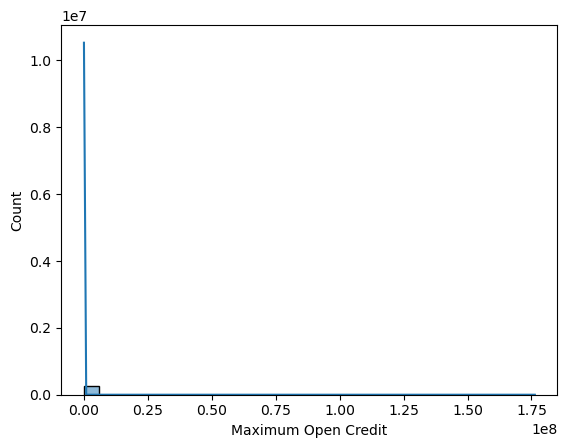

In [503]:
sns.histplot(df['Maximum Open Credit'], bins=30, kde=True)

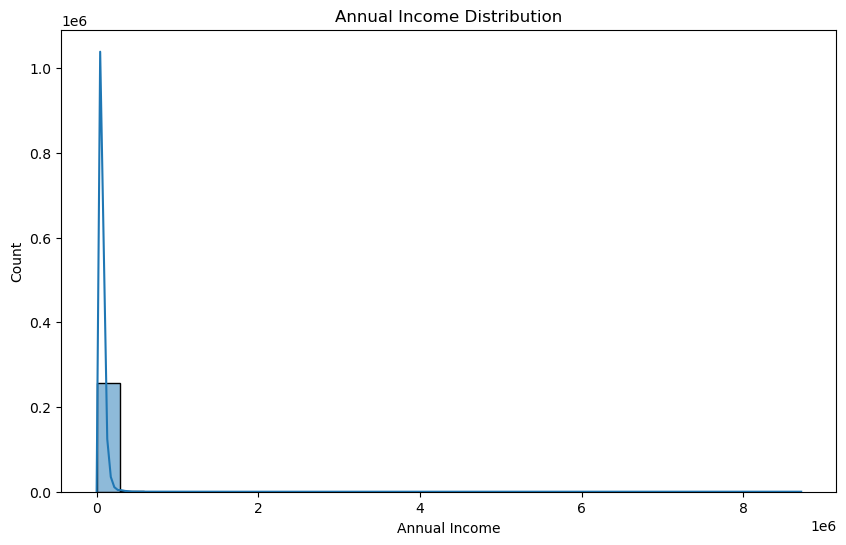

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

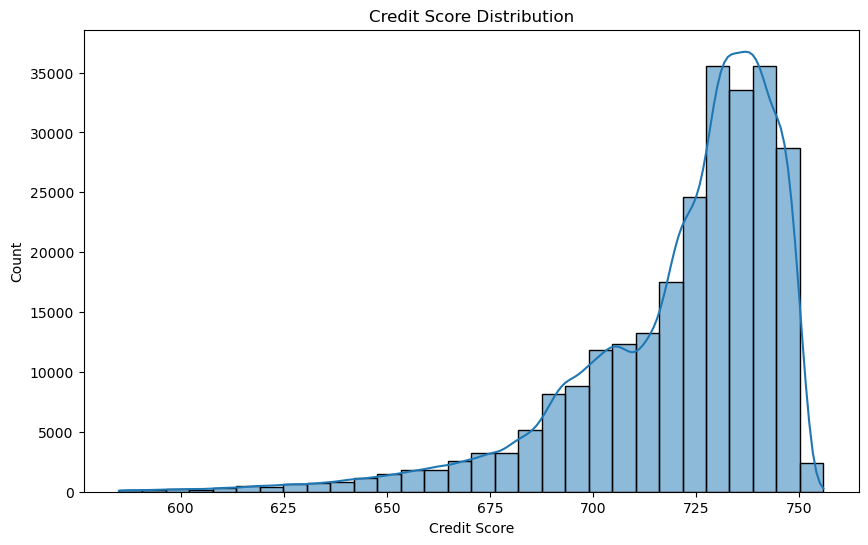

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit Score'], bins=30, kde=True)
plt.title('Credit Score Distribution')
plt.show()

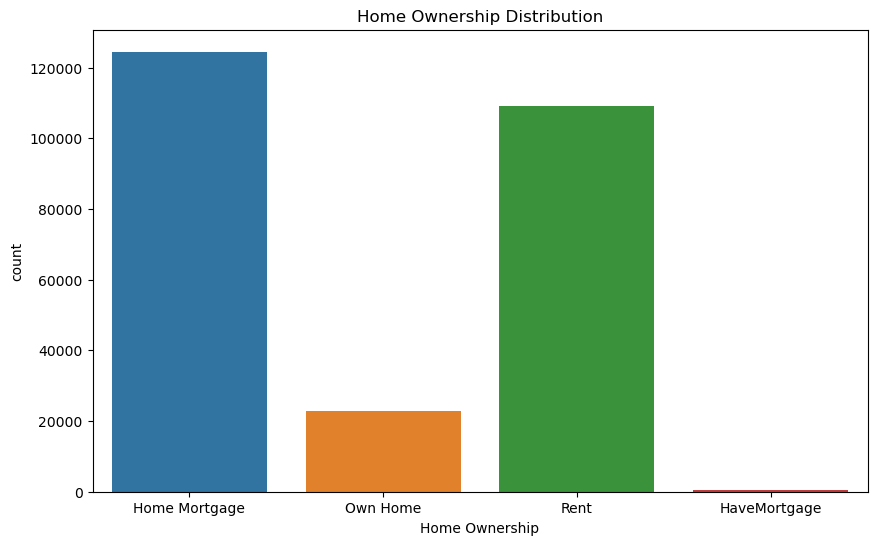

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Home Ownership', data=df)
plt.title('Home Ownership Distribution')
plt.show()

<Axes: xlabel='Annual Income', ylabel='Credit Score'>

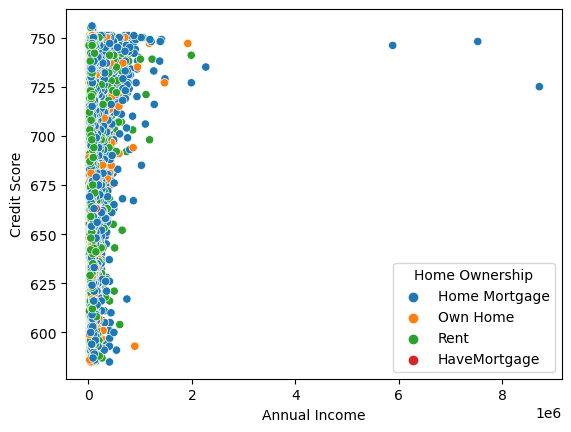

In [ ]:
sns.scatterplot(x='Annual Income', y='Credit Score', hue='Home Ownership' ,data=df)


<Axes: xlabel='Credit Score', ylabel='Monthly Debt'>

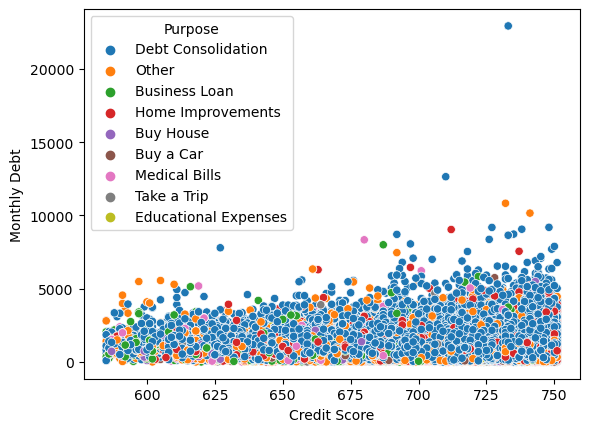

In [ ]:
sns.scatterplot(x='Credit Score', y='Monthly Debt', hue='Purpose', data=df)


<Axes: xlabel='Current Loan Amount', ylabel='Monthly Debt'>

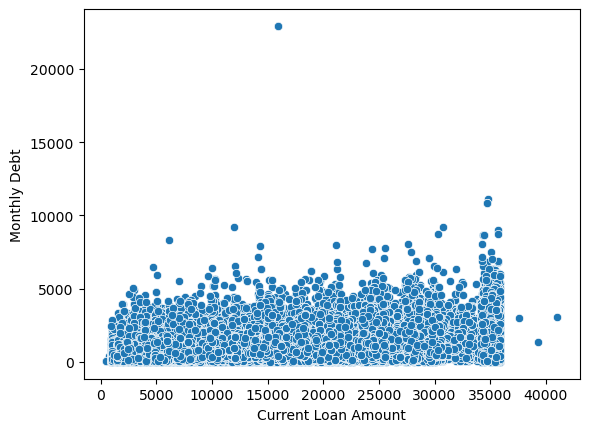

In [ ]:
sns.scatterplot(x='Current Loan Amount', y='Monthly Debt', data=df)


<Axes: xlabel='Credit Score', ylabel='Years of Credit History'>

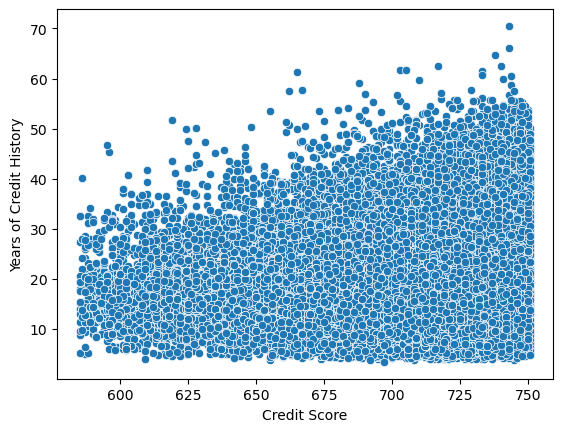

In [ ]:
sns.scatterplot(x='Credit Score', y='Years of Credit History', data=df)

In [ ]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.233733,0.059733,0.335476,0.434637,0.151483,-0.041492,0.200721,-0.074879,0.320556,0.042283,-0.097703,0.012584
Credit Score,-0.233733,1.000000,-0.016535,0.012355,-0.092755,0.085627,0.046358,-0.043592,-0.057502,-0.016729,0.010556,-0.043005,-0.027244
Years in current job,0.059733,-0.016535,1.000000,0.026313,0.057390,0.071901,0.022647,0.019648,0.033659,0.034181,-0.001762,0.031565,0.010295
Annual Income,0.335476,0.012355,0.026313,1.000000,0.454638,0.146859,-0.059675,0.140463,-0.013672,0.292165,0.030140,-0.044837,0.038185
Monthly Debt,0.434637,-0.092755,0.057390,0.454638,1.000000,0.188646,-0.056377,0.410416,-0.052792,0.472581,0.026433,-0.078440,0.020557
Years of Credit History,0.151483,0.085627,0.071901,0.146859,0.188646,1.000000,-0.039695,0.128033,0.061251,0.201001,0.021798,0.062049,0.020915
Months since last delinquent,-0.041492,0.046358,0.022647,-0.059675,-0.056377,-0.039695,1.000000,-0.035803,0.088612,-0.024292,-0.000541,0.112907,0.002730
Number of Open Accounts,0.200721,-0.043592,0.019648,0.140463,0.410416,0.128033,-0.035803,1.000000,-0.013731,0.222763,0.019305,-0.022805,0.005754
Number of Credit Problems,-0.074879,-0.057502,0.033659,-0.013672,-0.052792,0.061251,0.088612,-0.013731,1.000000,-0.103814,-0.008329,0.755866,0.584917
Current Credit Balance,0.320556,-0.016729,0.034181,0.292165,0.472581,0.201001,-0.024292,0.222763,-0.103814,1.000000,0.111659,-0.117995,-0.011118


In [ ]:
x = df.drop("Loan Status", axis=1)  
y = df[['Loan Status']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256984 entries, 0 to 256970
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Loan Status                256984 non-null  object 
 1   Current Loan Amount        256984 non-null  float64
 2   Term                       256984 non-null  object 
 3   Credit Score               256984 non-null  float64
 4   Home Ownership             256984 non-null  object 
 5   Annual Income              256984 non-null  float64
 6   Purpose                    256984 non-null  object 
 7   Monthly Debt               256984 non-null  float64
 8   Years of Credit History    256984 non-null  float64
 9   Number of Open Accounts    256984 non-null  int64  
 10  Number of Credit Problems  256984 non-null  int64  
 11  Current Credit Balance     256984 non-null  int64  
 12  Maximum Open Credit        256984 non-null  int64  
 13  Bankruptcies               256984 

In [ ]:
x = pd.get_dummies(x, columns=['Term', 'Home Ownership','Purpose'], drop_first=True)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        gnb=GaussianNB()
        bnb=BernoulliNB()
        lr=LogisticRegression()
        dt=DecisionTreeClassifier()
        rf=RandomForestClassifier()
        gbc=GradientBoostingClassifier()
        knc=KNeighborsClassifier()
        

       
        
        algos=[gnb,bnb,lr,dt,rf,gbc,knc]
        algo_names=['GaussianNB','BernoulliNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','KNeighborsClassifier']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        confusion_matrixes= []
        classification_reports= []
        accuracy_scores=[]        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            classification_reports.append(classification_report(p , y_test))
            confusion_matrixes.append(confusion_matrix(p , y_test))
            accuracy_scores.append(accuracy_score(p , y_test))

        for i in range(len(algo_names)):
            print('Algorithm:'+ '\n' , algo_names[i])
            print('Confusion Matrix:'+ '\n' , confusion_matrixes[i])
            print('Classification Report: '+ '\n' , classification_reports[i])
            print('Accuracy Score:'+ '\n' , accuracy_scores[i])
            print('************************************************************')
        
        
       

In [ ]:
algo_test(x,y)

Algorithm:
 GaussianNB
Confusion Matrix:
 [[11917 14664]
 [ 4193 20623]]
Classification Report: 
               precision    recall  f1-score   support

 Charged Off       0.74      0.45      0.56     26581
  Fully Paid       0.58      0.83      0.69     24816

    accuracy                           0.63     51397
   macro avg       0.66      0.64      0.62     51397
weighted avg       0.66      0.63      0.62     51397

Accuracy Score:
 0.633110881958091
************************************************************
Algorithm:
 BernoulliNB
Confusion Matrix:
 [[ 2253  2049]
 [13857 33238]]
Classification Report: 
               precision    recall  f1-score   support

 Charged Off       0.14      0.52      0.22      4302
  Fully Paid       0.94      0.71      0.81     47095

    accuracy                           0.69     51397
   macro avg       0.54      0.61      0.51     51397
weighted avg       0.87      0.69      0.76     51397

Accuracy Score:
 0.6905266844368348
*****************

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
pred = rf.predict(x_test)

In [ ]:
accuracy_score(pred, y_test)

0.8814133120610153

In [ ]:
confusion_matrix(pred, y_test)

array([[12392,  2377],
       [ 3718, 32910]])

<Axes: >

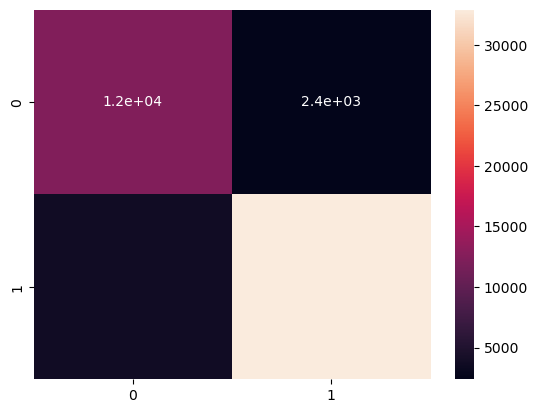

In [ ]:
sns.heatmap(confusion_matrix(pred , y_test), annot=True)

In [ ]:
print(classification_report(pred , y_test))

              precision    recall  f1-score   support

 Charged Off       0.77      0.84      0.80     14769
  Fully Paid       0.93      0.90      0.92     36628

    accuracy                           0.88     51397
   macro avg       0.85      0.87      0.86     51397
weighted avg       0.89      0.88      0.88     51397



## Results 

 According to the results of the model tests, the highest accuracy rate was obtained in the RandomForestClassifier algorithm.

 Predictions can be made using this model.

 While testing, the columns 'Months since last delinquent' and 'Years current in job' were removed from the dataset because they contained too much missing data and would be difficult to fill in.
